[1903.4275032075418]


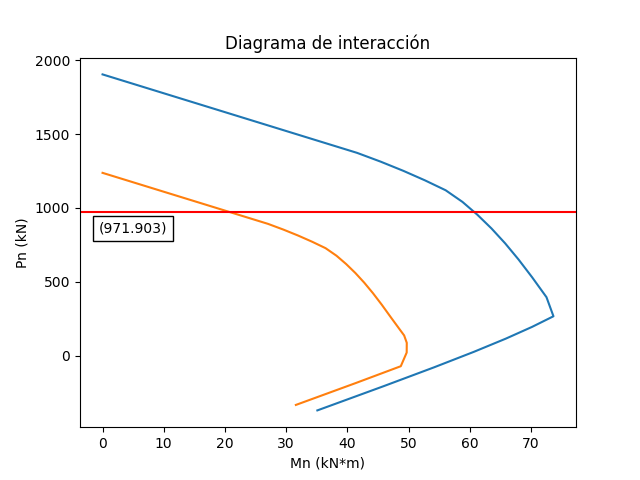

In [1]:

from cmath import pi
from math import copysign

import matplotlib.pyplot as plt
import numpy as np


fc = 210
fy = 4200
Es = 2100000
b = 25
h = 25
rec = 4
Num_barra = 2
Diam_estr = 1.0
Diam = 2.5
As1 = (Num_barra*pi*Diam*Diam)/4
As2 = (Num_barra*pi*Diam*Diam)/4
beta1=0.85

d_c= rec + (Diam/2) + Diam_estr
dt = h-d_c
esy=fy/Es
es1=[]
es2=[]
c=[]
a=[]
Mn=[]
Pn=[]
phi_Pn=[]
phi_Mn =[]
c=25
for i in range(20):
    if c == b:
        es1=0.003*((c-d_c)/c)
        es2=0.003*((dt-c)/c)
        Mn.append(0) 
        Pn.append((0.85*fc*c*b+2*As1*fy)*(9.81/1000)) 
        c = c-1
        print(Pn)
    elif c<b:
        c = c-1
        es1=0.003*((c-d_c)/c)
        es2=0.003*((dt-c)/c)
       
        signo1=copysign(1,es1)
        signo2=copysign(1,es2)
        
        fs1=min(fy,abs(es1*Es))
        fs2=min(fy,abs(es2*Es))
        a=beta1*c
       
        C_c = 0.85*fc*b*a
        C_s =As1*fs1*signo1
        T = As2*fs2*signo2
        Mn.append((C_c*(h/2 - a/2) + C_s*(h/2  - d_c) + T*(dt - h/2))*(9.81/100000)) 
        Pn.append((C_c + C_s - T)*(9.81/1000)) 
        
    if es2 >= 0.005:
        phi = 0.9
        phi_Pn.append(phi*Pn[i])
        phi_Mn.append(phi*Mn[i])
    else:
        phi=max(0.65,(0.65+0.25*((es2-esy)/(0.005-esy))))
        phi_Pn.append(phi*Pn[i])
        phi_Mn.append(phi*Mn[i])
Ag=b*h
Ast = As1+As2 
         
phi_Pnn=round((0.85*fc*(Ag-Ast)+fy*Ast)*0.65*0.8*(9.81/1000),3) 


# Configurar Grafica

fig,ax = plt.subplots()
bbox = dict( fc ="1")
label = f"({phi_Pnn})"

plt.annotate(label, 
                (5,phi_Pnn), 
                textcoords="offset points", 
                xytext=(0,-15),
                ha='center', bbox=bbox)
plt.plot(Mn,Pn)
plt.plot(phi_Mn,phi_Pn)
plt.axhline(y = phi_Pnn, xmin = 0, xmax = 10, color = 'r', linestyle = '-')




ax.set_title('Diagrama de interacción')
  
ax.set_ylabel('Pn (kN)')
ax.set_xlabel('Mn (kN*m)')

# show the plot
plt.show()